# Read data

In [973]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
data= pd.read_csv("E:\\All Aplication\\Interview-Task\\LIMC\\lmic_test_data_jds.csv")

In [974]:
data.head(20)

,month,geo,naics,employment_1000s
0,Jan-12,Alberta,"Agriculture [111-112, 1100, 1151-1152]",57.0
1,Jan-12,Alberta,"Forestry, fishing, mining, quarrying, oil and ...",169.4
2,Jan-12,Alberta,Utilities [22],16.6
3,Jan-12,Alberta,Construction [23],226.5
4,Jan-12,Alberta,Manufacturing [31-33],130.9
5,Jan-12,Alberta,"Wholesale and retail trade [41, 44-45]",326.0
6,Jan-12,Alberta,Transportation and warehousing [48-49],114.1
7,Jan-12,Alberta,"Finance, insurance, real estate, rental and le...",94.2
8,Jan-12,Alberta,"Professional, scientific and technical service...",170.7
9,Jan-12,Alberta,"Business, building and other support services ...",69.0


# Get familiar with data

In [975]:
data.shape 

(18480, 4)

In [976]:
data.dtypes

month                object
geo                  object
naics                object
employment_1000s    float64
dtype: object

# Create Second Dataset

In [977]:
#Create second dataset with deep copy 
second_data = data.copy(deep=True)

#Data cleanup
#Removing non-alphanumeric symbols in dataframe
second_data['naics'] = second_data['naics'].replace('[^a-zA-Z]', '', regex=True)
#convert upper case dataframe column values to make sure this is case incensetive
second_data['naics'] = second_data['naics'].str.upper()


#Validate data cleanup for 'naics' column - select all the unique values and print them sorted
s= second_data['naics'].unique()
print(sorted(s))

['ACCOMMODATIONANDFOODSERVICES', 'AGRICULTURE', 'BUSINESSBUILDINGANDOTHERSUPPORTSERVICES', 'CONSTRUCTION', 'EDUCATIONALSERVICES', 'FINANCEINSURANCEREALESTATERENTALANDLEASING', 'FORESTRYFISHINGMININGQUARRYINGOILANDGAS', 'HEALTHCAREANDSOCIALASSISTANCE', 'INFORMATIONCULTUREANDRECREATION', 'MANUFACTURING', 'OTHERSERVICESEXCEPTPUBLICADMINISTRATION', 'PROFESSIONALSCIENTIFICANDTECHNICALSERVICES', 'PUBLICADMINISTRATION', 'TRANSPORTATIONANDWAREHOUSING', 'UTILITIES', 'WHOLESALEANDRETAILTRADE']


In [979]:
#Remove Mon(Jan-, Feb- etc...) and add prefix "20" before the last 2 digit of 'month' cloumn values
second_data['month'] = '20' + second_data['month'].str[4:]

#Data group by year, 'naics' and 'geo'; and convert to dataframe to write to csv
new_data= second_data.groupby(['month','naics','geo']).sum().reset_index()
new_data.head(10)

,month,naics,geo,employment_1000s
0,20,ACCOMMODATIONANDFOODSERVICES,Alberta,15144.7
1,20,ACCOMMODATIONANDFOODSERVICES,British Columbia,18754.9
2,20,ACCOMMODATIONANDFOODSERVICES,Canada,124077.9
3,20,ACCOMMODATIONANDFOODSERVICES,Manitoba,4300.9
4,20,ACCOMMODATIONANDFOODSERVICES,New Brunswick,2403.7
5,20,ACCOMMODATIONANDFOODSERVICES,Newfoundland and Labrador,1628.4
6,20,ACCOMMODATIONANDFOODSERVICES,Nova Scotia,3352.9
7,20,ACCOMMODATIONANDFOODSERVICES,Ontario,46293.9
8,20,ACCOMMODATIONANDFOODSERVICES,Prince Edward Island,589.4
9,20,ACCOMMODATIONANDFOODSERVICES,Quebec,27381.3


In [ ]:
second_data.to_csv("E:\\All Aplication\\Interview-Task\\LIMC\\lmic_Second_data_set.csv")

# QUESTION 1(B) DATA VISUALTION BASED ON GIVEN 3 SECTORS

In [970]:
#Cleanup given input data
#Removing non-alphanumeric symbols in 'naics' column values and convert to uppercase
data['naics'] = data['naics'].replace('[^a-zA-Z]', '', regex=True)
data['naics'] = data['naics'].str.upper()

#Select data based on given 3 sectors into a dataframe
df1 = data[(data['naics']== "WHOLESALEANDRETAILTRADE") | (data['naics']=="ACCOMMODATIONANDFOODSERVICES") | (data['naics']=="OTHERSERVICESEXCEPTPUBLICADMINISTRATION")]

In [971]:
#Filter data based on given month range Jan-20 to Sep-20
df2 = df1[df1['month'].isin(['Jan-20', 'Feb-20', 'Mar-20','Apr-20', 'May-20', 'Jun-20', 'Jul-20','Aug-20','Sep-20'])]

['Alberta' 'British Columbia' 'Canada' 'Manitoba' 'New Brunswick'
 'Newfoundland and Labrador' 'Nova Scotia' 'Ontario'
 'Prince Edward Island' 'Quebec' 'Saskatchewan']
flag                                         0      1      2      3      4  \
naics                                                                        
ACCOMMODATIONANDFOODSERVICES             156.6  156.8  113.1   77.5   85.2   
OTHERSERVICESEXCEPTPUBLICADMINISTRATION  105.2  112.5  103.9   80.2   92.2   
WHOLESALEANDRETAILTRADE                  330.6  337.5  310.0  260.2  269.5   

flag                                         5      6      7      8  
naics                                                                
ACCOMMODATIONANDFOODSERVICES              97.1  111.4  114.5  113.0  
OTHERSERVICESEXCEPTPUBLICADMINISTRATION   96.2  101.3   97.1   99.4  
WHOLESALEANDRETAILTRADE                  295.7  310.3  318.6  322.5  
flag                                         0      1      3      4      5  \
naics        

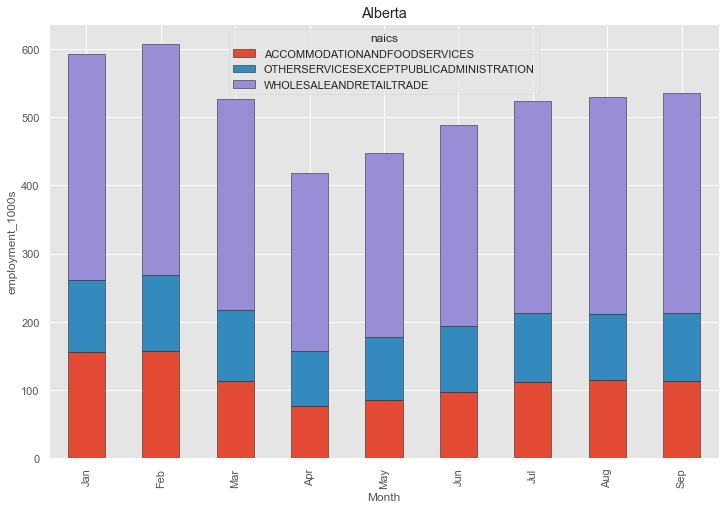

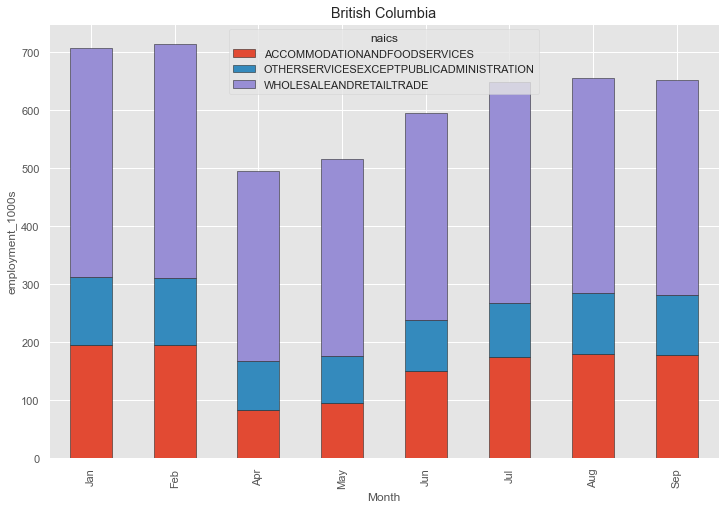

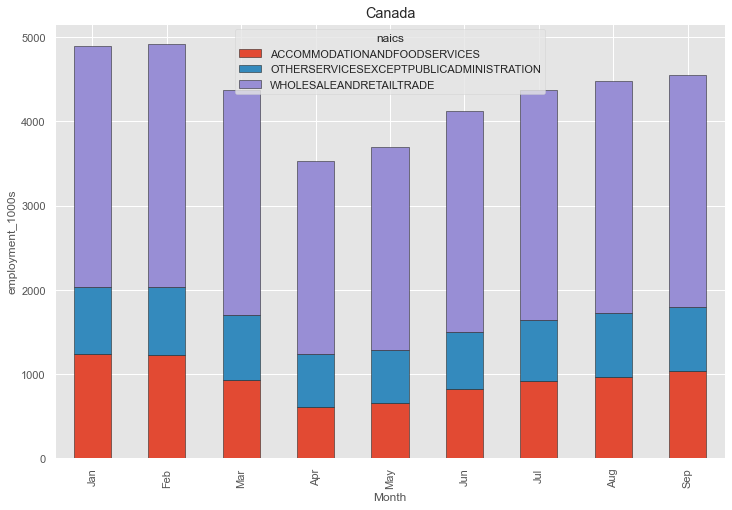

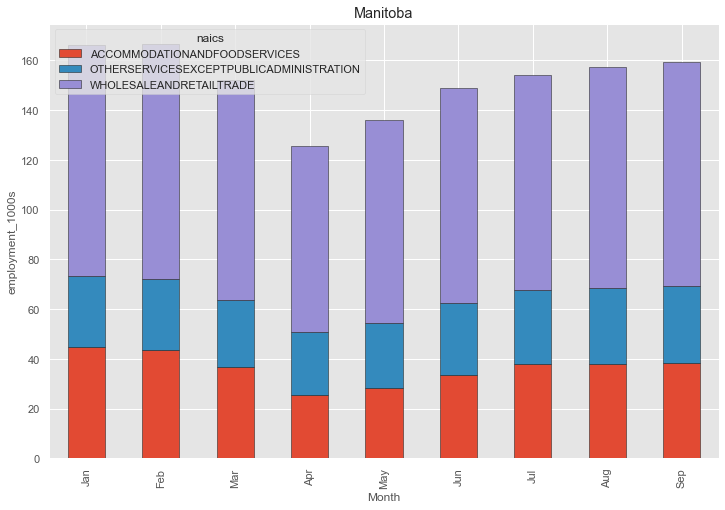

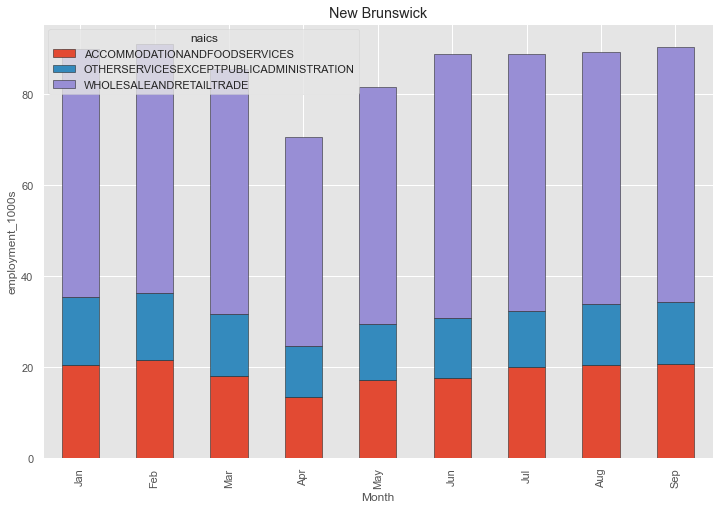

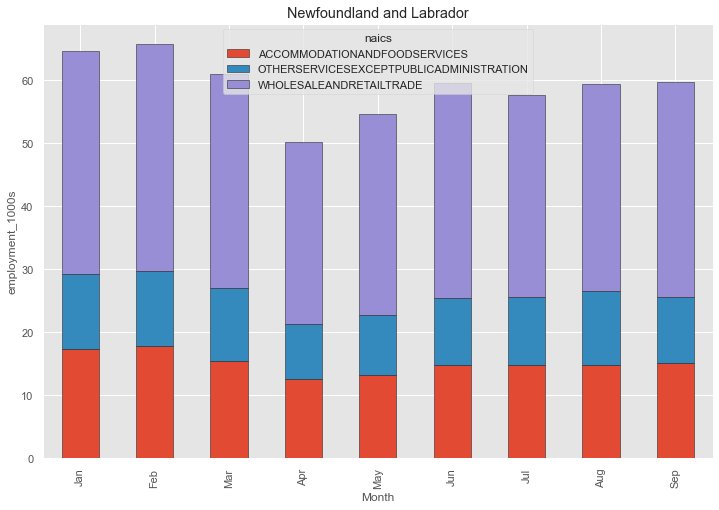

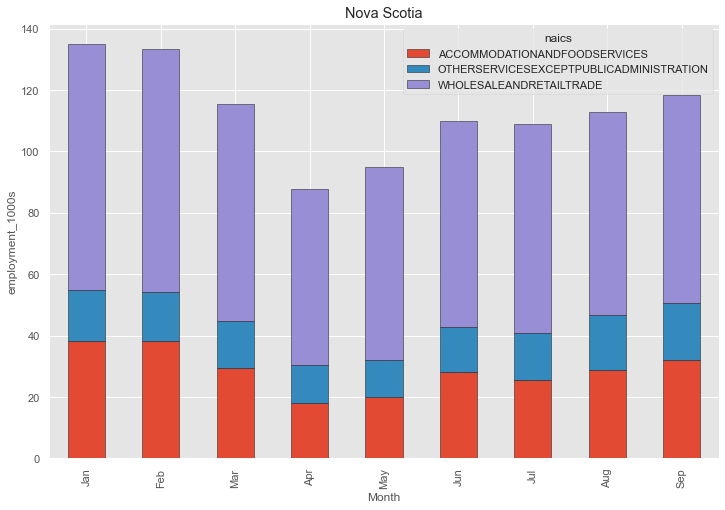

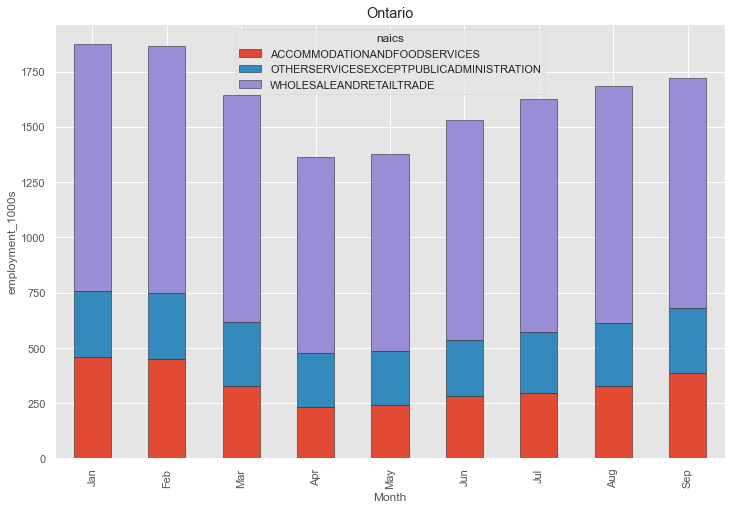

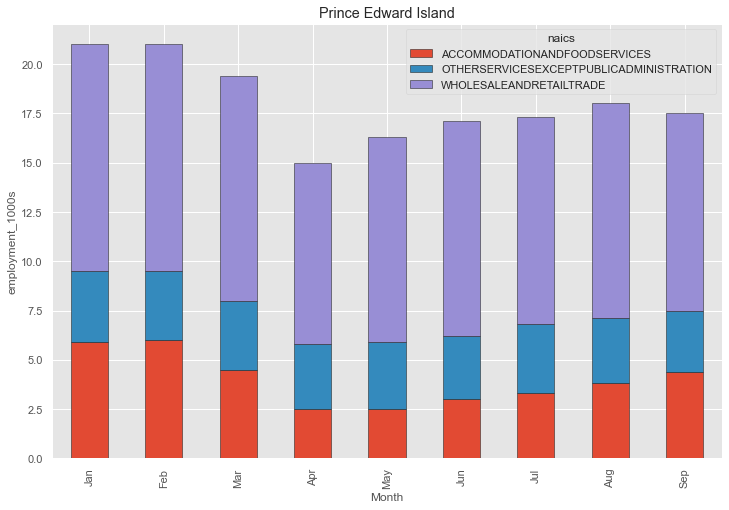

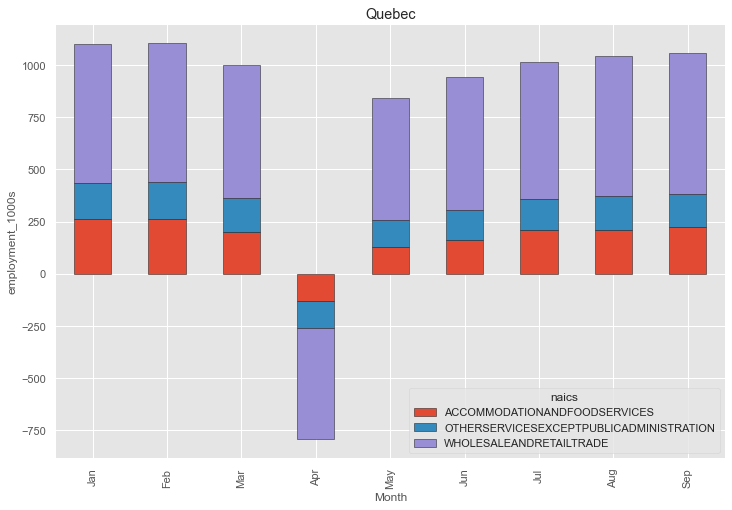

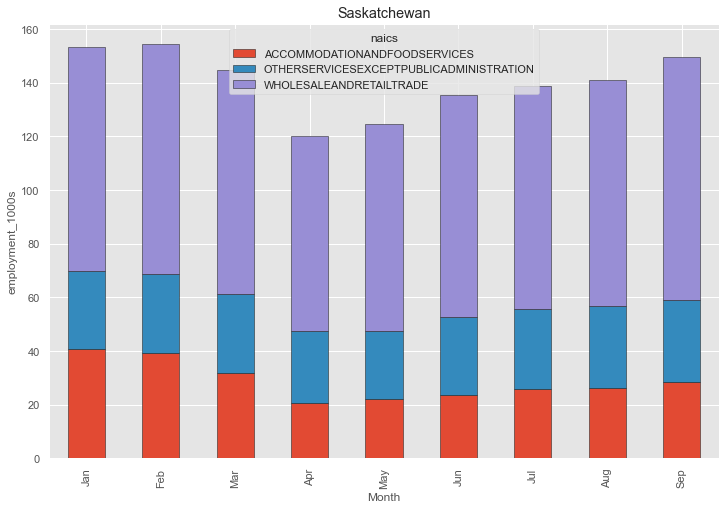

In [972]:
#List all unique provinces
df_geo =[]
df_geo= df2.geo.unique()
print(df_geo)

#Create a dictionary to map Month value to their corresponding order
month_dict = {}
month_dict = {"0": "Jan","1": "Feb","2":"Mar", "3": "Apr", "4":"May", "5":"Jun","6":"Jul","7":"Aug","8":"Sep"}

for province in df_geo:
    #Filter data based on provinces, month, sectors and number of employess 
    df3 = df2.loc[(df2['geo'].isin([province]))]
    df3 = df3[['geo', 'month','employment_1000s','naics']]
    
    #Capitalize (Jan, Feb...) month value and remove year
    df3['month'] = df3['month'].str.capitalize()
    df3['month'] = df3['month'].str[:3]
    
    #Sort data based on Month order (Jan->Feb->Mar..)
    df3["month"] = pd.to_datetime(df3.month, format='%b', errors='coerce').dt.month
    df4= df3.sort_values(['naics','month'], ascending=[True, True])
    
    #Re-arrange data with months as columns having values total number of emplyees, for given 2 sectors
    df5= (df4.assign(flag=df4.groupby('naics').employment_1000s.cumcount()).pivot_table(index='naics', columns='flag', values='employment_1000s', aggfunc='first'))
    print(df5)
    
    # Get list of columns (i.e., months) and assign Month value (Jan, Feb..) for each proviince. 
    #This is done as British Columbia has missing data for Apr
    df5_col_list= list(df5.columns.values)    
    mon_list=[]
    for mon in df5_col_list:
        mon_list.append(month_dict[str(mon)])
    
    #Assign Mon value (Jan, Feb...) and Transpose the dataframe to plot the data. 
    df5.columns = mon_list
    df5_transposed = df5.T
    
    #Data PLot with stacked bar chart for each of the given month
    bar_width = 0.35
    df5_transposed.plot(kind="bar",stacked=True,figsize=(12,8), edgecolor='k')
    plt.title(province)
    plt.xlabel("Month")
    plt.ylabel("employment_1000s")
    #Save the plot as per province
    file_name = "E:\\All Aplication\\Interview-Task\\LIMC\\Visualization_" + province +".png" 
    plt.savefig(file_name)